# Homework 3
## Astronomy 16 - Spring 2019
## Allison Culbert, February 21, 2019
This homework aims to model and evalutate different probability distributions of data and the ways in which priors impact the plotted distribution. First, modules are imported that will be used in this assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.integrate as integrate
import warnings
warnings.filterwarnings("ignore")

## A. Bayes' Theorem 1
This section aims to calculate the posterior probability of red balls in an urn. The first function is defined using Bayes Theorem: 
$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$

In [2]:
# prob
# parameters: an integer or array of integer values, an
#             an integer probability, an integer total, 
#             an integer normalization factor, a boolean
# returns: an integer or array of integer probability values
def prob(n, R, T, normFact, array):
    TFact = np.math.factorial(T)
    RFact = np.math.factorial(R)
    minFact = np.math.factorial(T-R)
    a = TFact/(RFact*minFact)
    if array == True:
        yvals = []
        for i in n:
            ρ = i/10
            yvals.append(normFact*(a*((ρ**R)*((1-ρ)**(T-R)))))
        return yvals
    else:
        n = int(n)
        ρ = n/10
        return normFact*(a*((ρ**R)*((1-ρ)**(T-R))))

# norm
# parameters: a tuple of function parameters, a function,
#             an upper and lower bound integer value
# returns: an integer normalization factor
def norm(argVals, func, lower, upper):
    result = integrate.quad(func, lower, upper, args=argVals)
    return 1/result[0]

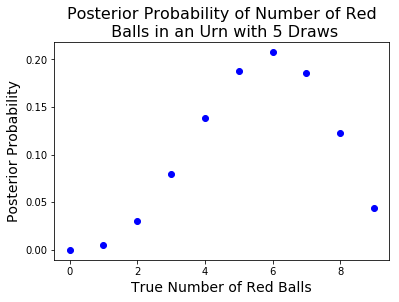

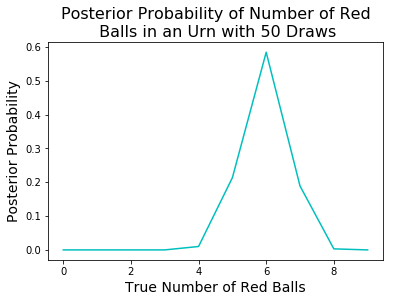

In [4]:
# Using norm to model probability distribution of picking
# red balls from an urn
normFact = norm((3, 5, 1, False), prob, 0, 10)
xvals = np.arange(0, 10, 1)
yvals = prob(xvals, 3, 5, normFact, True)
plt.plot(xvals, yvals, 'bo')
plt.xlabel("True Number of Red Balls", fontsize = 14)
plt.ylabel("Posterior Probability", fontsize = 14)
plt.title("Posterior Probability of Number of Red\n Balls in an Urn with 5 Draws", fontsize = 16)
plt.show()

normFact = norm((30, 50, 1, False), prob, 0, 10)
xvals = np.arange(0, 10, 1)
yvals = prob(xvals, 30, 50, normFact, True)

# format plot
plt.plot(xvals, yvals, c="c")
plt.xlabel("True Number of Red Balls", fontsize = 14)
plt.ylabel("Posterior Probability", fontsize = 14)
plt.title("Posterior Probability of Number of Red\n Balls in an Urn with 50 Draws", fontsize = 16)
plt.show()

## B. Bayes' Theorem 2
This section uses Bayes' theorum to model the probability distribution of supernovas per century. This is done using both a uniform prior and a haldane prior. 

Haldane prior: $prob(\rho ) = \frac{1}{\sqrt{\rho(1-\rho)}}$

First, probability funciton is defined:

In [9]:
# rhoProb
# parameters: an integer or array of integer values, an
#             an integer probability, an integer total, 
#             an integer normalization factor, two booleans
# returns: an integer or array of integer probability values
def rhoProb(n, val, tot, normFact, array, Hald):
    yvals = []
    totFact = np.math.factorial(tot)
    nFact = np.math.factorial(val)
    minFact = np.math.factorial(tot - val)
    a = totFact/(nFact*minFact)
    if array == True:
        for i in n:
            if Hald == True:
                prior = haldPri(i)
            else:
                prior = 1
            yvals.append(normFact*prior*(a*(i**val)*((1-i)**(tot-val))))
        return yvals
    else:
        if Hald == True:
            prior = 1/(np.sqrt(n*(1-n)))
        else:
            prior = 1
        return (prior*normFact*(a*(n**val)*((1-n)**(tot-val))))

def haldPri(x):
    return 1/(np.sqrt(x*(1-x)))
    
def mean(n, m, hald):
    nom = n+1
    denom = n+m+2
    m = nom/denom
    if hald == True:
        pri = integrate.quad(haldPri, 0, 1)
        return m*pri[0]
    return m

Then, the probability is plotted with two different priors.

peak of uniform: (0.4, 2.76)
mean of uniform: 0.42
peak of Haldane: (0.39, 2.65)
mean of Haldane: 1.31


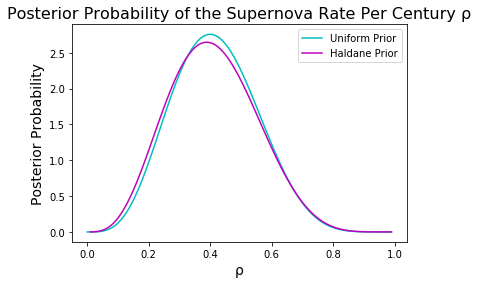

In [19]:
normFact = norm((4, 10, 1, False, False), rhoProb, 0, 1)
xvals = np.arange(0, 1, 0.01)
yvals = rhoProb(xvals, 4, 10, normFact, True, False)
print("peak of uniform: (" + str(xvals[yvals.index(max(yvals))])+ ", "+ str(round(max(yvals), 2))+")")
print("mean of uniform: " + str(round(mean(4, 6, False), 2)))
plt.plot(xvals, yvals, c="c")

# Haldane Prior
normFact = norm((4, 10, 1, False, True), rhoProb, 0, 1)
xvals = np.arange(0, 1, 0.01)
yvals = rhoProb(xvals, 4, 10, normFact, True, True)
print("peak of Haldane: (" + str(xvals[yvals.index(max(yvals[1:]))])+ ", "+ str(round(max(yvals[1:]), 2))+")")
print("mean of Haldane: " + str(round(mean(4, 6, True), 2)))
plt.plot(xvals, yvals, c="m")

plt.title("Posterior Probability of the Supernova Rate Per Century ρ", fontsize=16)
plt.xlabel("ρ", fontsize=14)
plt.ylabel("Posterior Probability", fontsize=14)
plt.legend(("Uniform Prior", "Haldane Prior"), loc='upper right')
plt.show()

Here, we see how the Haldane prior shifts the data slightly leftwards and downwards. The mean of the Haldane was computated by multiplying the mean of the function with a prior of one (with bounds 0 to 1) times the integral of the Haldane prior (with bounds 0 to 1), which is equal to 1.31. This is more than three times that of the uniform prior. This is an interesting result, which leads me to think that the Haldane prior results in more concentration in the higher probability values than the uniform prior.

## C. Gaussian distribution 1
This next section evaluates a Gaussian distribution with a mean located at 0 and a standard deviation of 1.

The mathematical form of the Guassian distribution is as follows:

$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$

In [14]:
# gauss
# parameters: an integer x value, an integer mean vlue, and an integer standard deviation
# returns: an integer representing the probability corresponding to the x value
def gauss(x, mu, sig):
    ex = (-((x-mu)**2))/(2*(sig**2))
    denom = sig*np.sqrt(2*np.pi)
    return (1/denom)*np.exp(ex)

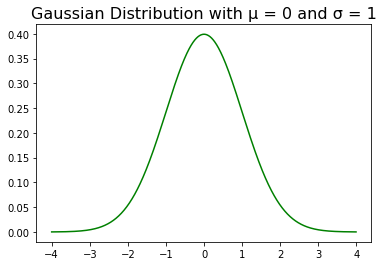

In [15]:
xvals = np.arange(-4, 4, 0.01)
yvals = gauss(xvals, 0, 1)
plt.plot(xvals, yvals, c="g")
plt.title("Gaussian Distribution with μ = 0 and σ = 1", fontsize=16)
plt.show()

In [16]:
gaussProb = integrate.quad(gauss , -1.5, 1.5, args=(0, 1))
print("Probability that a measurement will deviate from the mean")
print("by less than 1.5σ = " + str(round(gaussProb[0]*100, 2))+"%")

Probability that a measurement will deviate from the mean
by less than 1.5σ = 86.64%


The above reveals that more than 86% of the measurements are within 1.5$\sigma$ of the mean.

## D. Gaussian distribution 2
This next section evaluates a Gaussian distribution with a mean located at 2.5 and a standard deviation of 0.4. The same function from above is used,  with the mean and standard deviation changed.

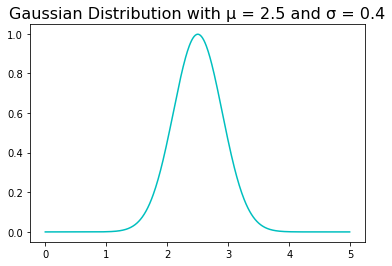

In [17]:
xvals = np.arange(0, 5, 0.01)
yvals = gauss(xvals, 2.5, 0.4)
plt.title("Gaussian Distribution with μ = 2.5 and σ = 0.4", fontsize=16)
plt.plot(xvals, yvals, c="c")
plt.show()

In [18]:
gaussProb = integrate.quad(gauss , -np.inf, 2.0855, args=(2.5, 0.4))
print("Percent of measurements between -infinity and 2.0855 = "+str(round(100*gaussProb[0], 2))+ "%")
sigUnit = (2.5-2.0855)/0.4
print("2.0855 = 2.5 - " + str(round(sigUnit, 2)) + "σ")
gaussProb = integrate.quad(gauss , 2.9146, np.inf, args=(2.5, 0.4))
print("Percent of measurements between 2.9146 and infinity = "+str(round(100*gaussProb[0], 2))+ "%")
sigUnit = (2.9146-2.5)/0.4
print("2.9146 = 2.5 + " + str(round(sigUnit, 2)) + "σ")

Percent of measurements between -infinity and 2.0855 = 15.0%
2.0855 = 2.5 - 1.04σ
Percent of measurements between 2.9146 and infinity = 15.0%
2.9146 = 2.5 + 1.04σ


This shows that for this distribution, 70% of the measurements are within one standard deviation of the mean.